# DS CA6

Written by Babak Hosseini Mohtasham 810101408, Parsa Ahmadi 810101609 and Mahdi Naeini 810101536

## Table of Contents: <a id='top0'></a> 
- [Introduction](#introduction)     

- [Understanding and Exploring the Dataset](#dataset)  

- [Preprocessing of dataset](#preprocessing)

- [Dimensionality Reduction](#reduction)

- [Unsupervised Learning](#learning)

    - [K-Means](#kmeans)

    - [DBSCAN](#DBSCAN)

    - [Silhouette Method](#silhouette)

- [Questions](#questions)
   
- [References](#references)  

## Introduction <a id='introduction'></a>

In this assignment, we will delve into dimensionality reduction and unsupervised learning tasks. Firstly, we should preprocess the provided dataset to prepare it for analysis. Next, we will apply dimensionality reduction techniques to simplify the dataset's complexity. Then, we will use unsupervised learning algorithms to tackle the task. Finally, we evaluate and analyze the results for comparison.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import Normalizer, FunctionTransformer

## Understanding and Exploring the Dataset <a id='dataset'></a>

In 2014, some researchers published an article called "Impact of c1HbA Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records." They gathered data on diabetic patients from many hospitals and clinics in America. Some of this data, about 200,000 items with 50 features, has been shared with the public in a way that keeps people's identities private

In [3]:
df = pd.read_csv("diabetic_data.csv")
original_size = df.shape[0]
df.shape

(101766, 50)

In [4]:
df.describe() 

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': missing_percentage})
missing_data_df

Missing Values  Percentage Missing
encounter_id                           0            0.000000
patient_nbr                            0            0.000000
race                                   0            0.000000
gender                                 0            0.000000
age                                    0            0.000000
weight                                 0            0.000000
admission_type_id                      0            0.000000
discharge_disposition_id               0            0.000000
admission_source_id                    0            0.000000
time_in_hospital                       0            0.000000
payer_code                             0            0.000000
medical_specialty                      0            0.000000
num_lab_procedures                     0            0.000000
num_procedures                         0            0.000000
num_medications                        0            0.000000
number_outpatient                      0            0.000000
number_emergency                       0            0.000000
number_inpatient                       0            0.000000
diag_1                                 0            0.000000
diag_2                                 0            0.000000
diag_3                                 0            0.000000
number_diagnoses                       0            0.000000
max_glu_serum                      96420           94.746772
A1Cresult                          84748           83.277322
metformin                              0            0.000000
repaglinide                            0            0.000000
nateglinide                            0            0.000000
chlorpropamide                         0            0.000000
glimepiride                            0            0.000000
acetohexamide                          0            0.000000
glipizide                              0            0.000000
glyburide                              0            0.000000
tolbutamide                            0            0.000000
pioglitazone                           0            0.000000
rosiglitazone                          0            0.000000
acarbose                               0            0.000000
miglitol                               0            0.000000
troglitazone                           0            0.000000
tolazamide                             0            0.000000
examide                                0            0.000000
citoglipton                            0            0.000000
insulin                                0            0.000000
glyburide-metformin                    0            0.000000
glipizide-metformin                    0            0.000000
glimepiride-pioglitazone               0            0.000000
metformin-rosiglitazone                0            0.000000
metformin-pioglitazone                 0            0.000000
change                                 0            0.000000
diabetesMed                            0            0.000000
readmitted                             0            0.000000

In [7]:
n_unique_values = df.nunique()
pd.DataFrame(n_unique_values) 

0
encounter_id              101766
patient_nbr                71518
race                           6
gender                         3
age                           10
weight                        10
admission_type_id              8
discharge_disposition_id      26
admission_source_id           17
time_in_hospital              14
payer_code                    18
medical_specialty             73
num_lab_procedures           118
num_procedures                 7
num_medications               75
number_outpatient             39
number_emergency              33
number_inpatient              21
diag_1                       717
diag_2                       749
diag_3                       790
number_diagnoses              16
max_glu_serum                  3
A1Cresult                      3
metformin                      4
repaglinide                    4
nateglinide                    4
chlorpropamide                 4
glimepiride                    4
acetohexamide                  2
glipizide                      4
glyburide                      4
tolbutamide                    2
pioglitazone                   4
rosiglitazone                  4
acarbose                       4
miglitol                       4
troglitazone                   2
tolazamide                     3
examide                        1
citoglipton                    1
insulin                        4
glyburide-metformin            4
glipizide-metformin            2
glimepiride-pioglitazone       2
metformin-rosiglitazone        2
metformin-pioglitazone         2
change                         2
diabetesMed                    2
readmitted                     3

## Preprocessing of dataset <a id='preprocessing'></a>

remove null features:

In [8]:
df.drop(['max_glu_serum', 'A1Cresult'], axis=1, inplace=True)

remove irrelevant features:

In [9]:
df.drop(['patient_nbr', 'payer_code'], axis=1, inplace=True)

In [10]:
print("null percentage for weight:" ,df[df['weight'] == '?'].shape[0] / df.shape[0])
print("null percentage for medical_specialty:" ,df[df['medical_specialty'] == '?'].shape[0] / df.shape[0])

df.drop(['weight' , 'medical_specialty'], axis=1, inplace=True)

null percentage for weight: 0.9685847925633315
null percentage for medical_specialty: 0.49082208203132677


The primary, secondary, and third medical diagnoses are marked by the ICD9 codes.

ICD9 code for diabetes: 250.xx

'diag' as '1' if it relates to diabetes and '0' if it's not

In [11]:
def get_diag1(diag):
    if diag.startswith('250'):
        return 1
    else:
        return 0

In [12]:
def get_diag2(diag):
    try:
        num = np.float64(diag)
        return num
    except:
        return -1

In [13]:
for col in ["diag_1", "diag_2", "diag_3"]:
    df[col] = pd.Series([ get_diag2(x) for x in df[col]])

remove rows that have NA in 'race', 'diag_1', 'diag_2', 'diag_3' or 'gender'

In [14]:
print("null percentage for race:" ,df[df['race'] == '?'].shape[0] / df.shape[0])
print("null percentage for diag_1:" ,df[df['diag_1'] == -1].shape[0] / df.shape[0])
print("null percentage for diag_2:" ,df[df['diag_2'] == -1].shape[0] / df.shape[0])
print("null percentage for diag_3:" ,df[df['diag_3'] == -1].shape[0] / df.shape[0])
print("null percentage for gender:" ,df[df['gender'] == 'Unknown/Invalid'].shape[0] / df.shape[0])

df.query("race != '?'", inplace=True)
df.query("diag_1 != '?'", inplace=True)
df.query("diag_2 != '?'", inplace=True)
df.query("diag_3 != '?'", inplace=True)
df.query("gender != 'Unknown/Invalid'", inplace=True)
df.reset_index(drop=True, inplace=True)

null percentage for race: 0.022335554114340742
null percentage for diag_1: 0.016370890081166597
null percentage for diag_2: 0.02843778865239864
null percentage for diag_3: 0.06368531729654305
null percentage for gender: 2.947939390366134e-05


the response variable 'readmitted' in the dataset contains three categories.

- readmitted within 30 days (<30)

- readmitted after 30 days (>30)

- never readmitted (NO)

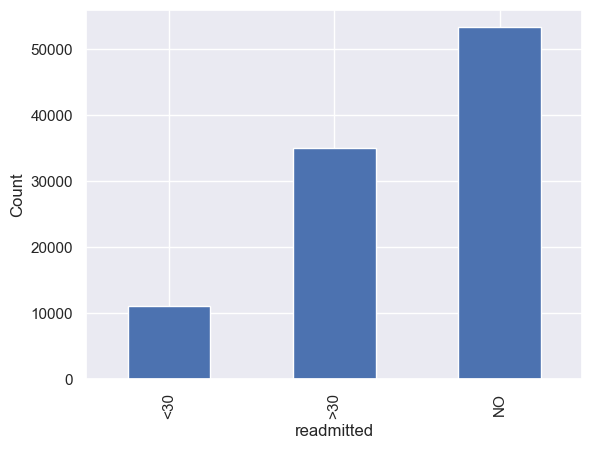

In [15]:
sns.set_theme()
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

recode the response variable

- '0' means no readmission

- '1' means readmission no matter how many days after being discharged

In [16]:
def get_readmitted(readmitted):
    if readmitted == "NO":
        return 0
    elif readmitted == ">30":
        return 1
    else:
        return 2

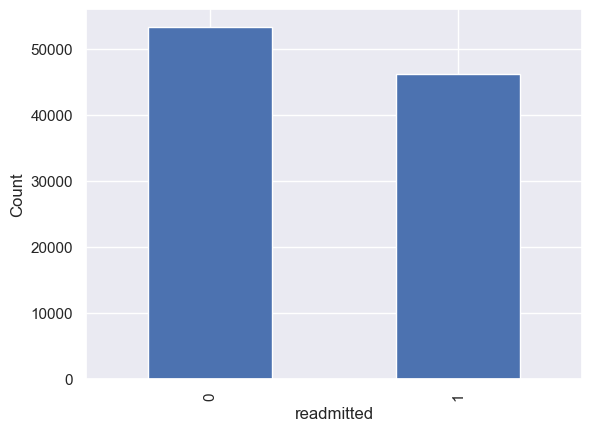

In [17]:
df['readmitted'] = pd.Series([0 if val == 'NO' else 1 for val in df['readmitted']])
sns.set_theme()
df.groupby('readmitted').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

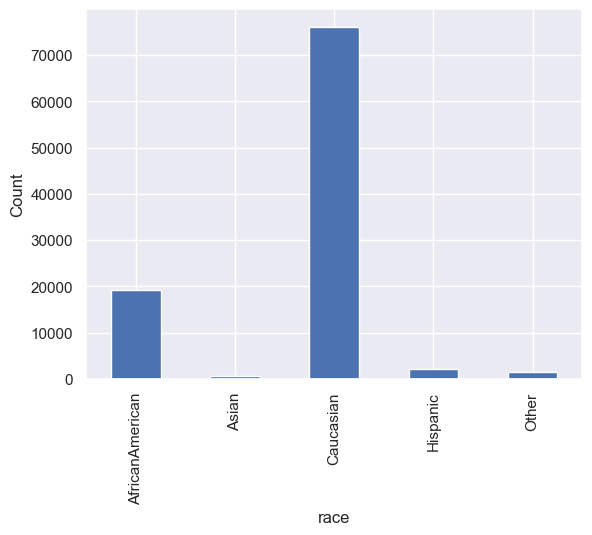

In [18]:
df.groupby('race').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

categorical features to numerical:

In [19]:
def get_race(race):
    if race == "AfricanAmerican":
        return 0
    elif race == "Caucasian":
        return 1
    else:
        return 2

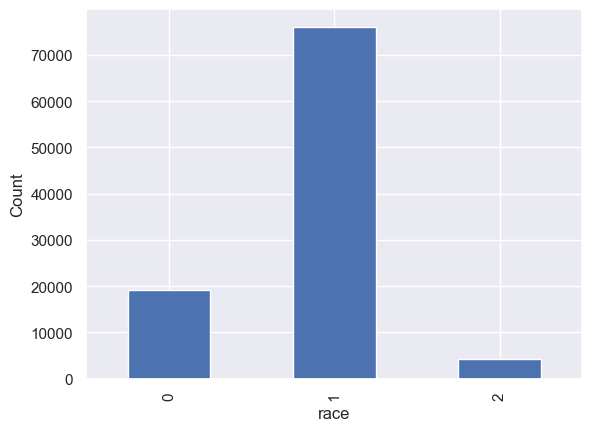

In [20]:
df['race'] = pd.Series([ get_race(race) for race in df['race']])
df.groupby('race').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

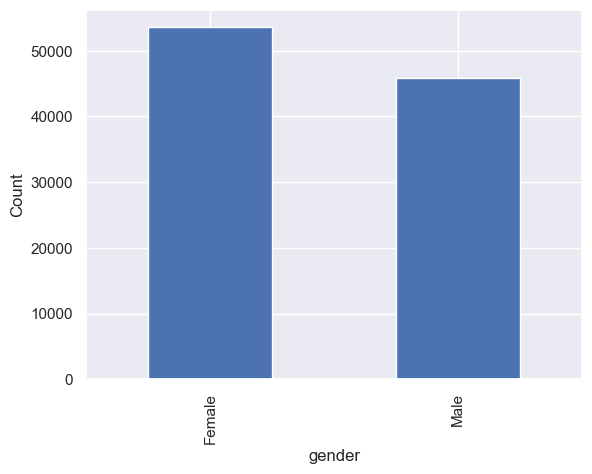

In [21]:
df.groupby('gender').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [22]:
def get_gender(gender):
    if gender == "Female":
        return 0
    else:
        return 1

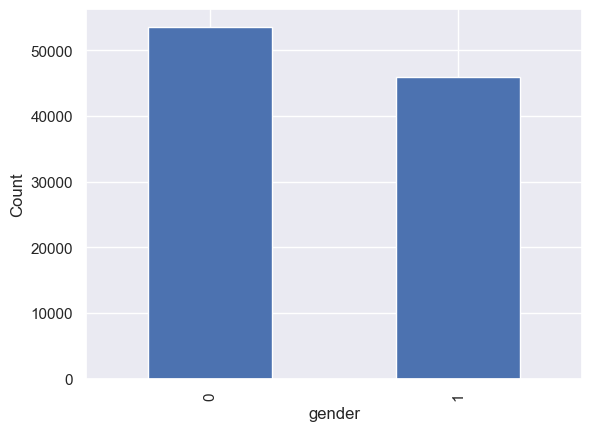

In [23]:
df['gender'] = pd.Series([ get_gender(gender) for gender in df['gender']])
df.groupby('gender').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

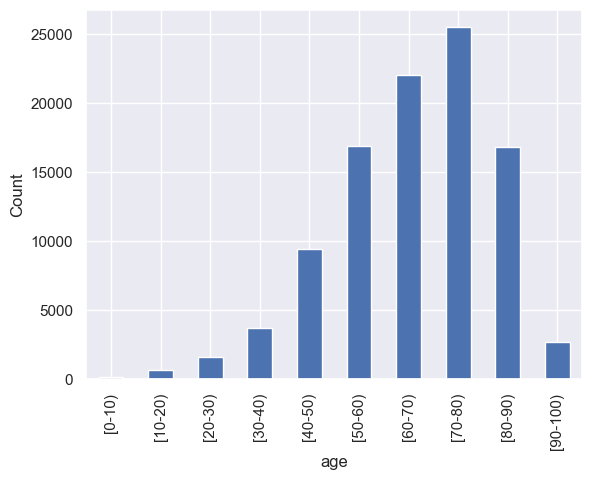

In [24]:
df.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

get mean age:

In [25]:
def get_mean_age(age):
    start, end = map(int, age.strip('[)').split('-'))
    return (start + end) / 2

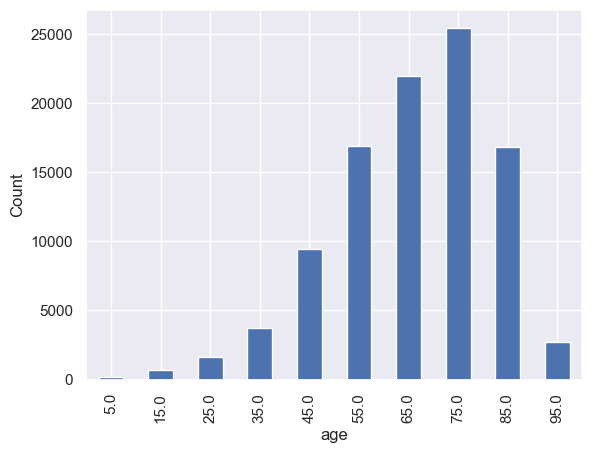

In [26]:
df['age'] = pd.Series([ get_mean_age(age) for age in df['age']])
df.groupby('age').size().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [27]:
categorical_columns = []
for col in df.columns.to_list():
    if df[col].isin(["No"]).any() == True:
        categorical_columns.append(col)

print(len(categorical_columns))

25


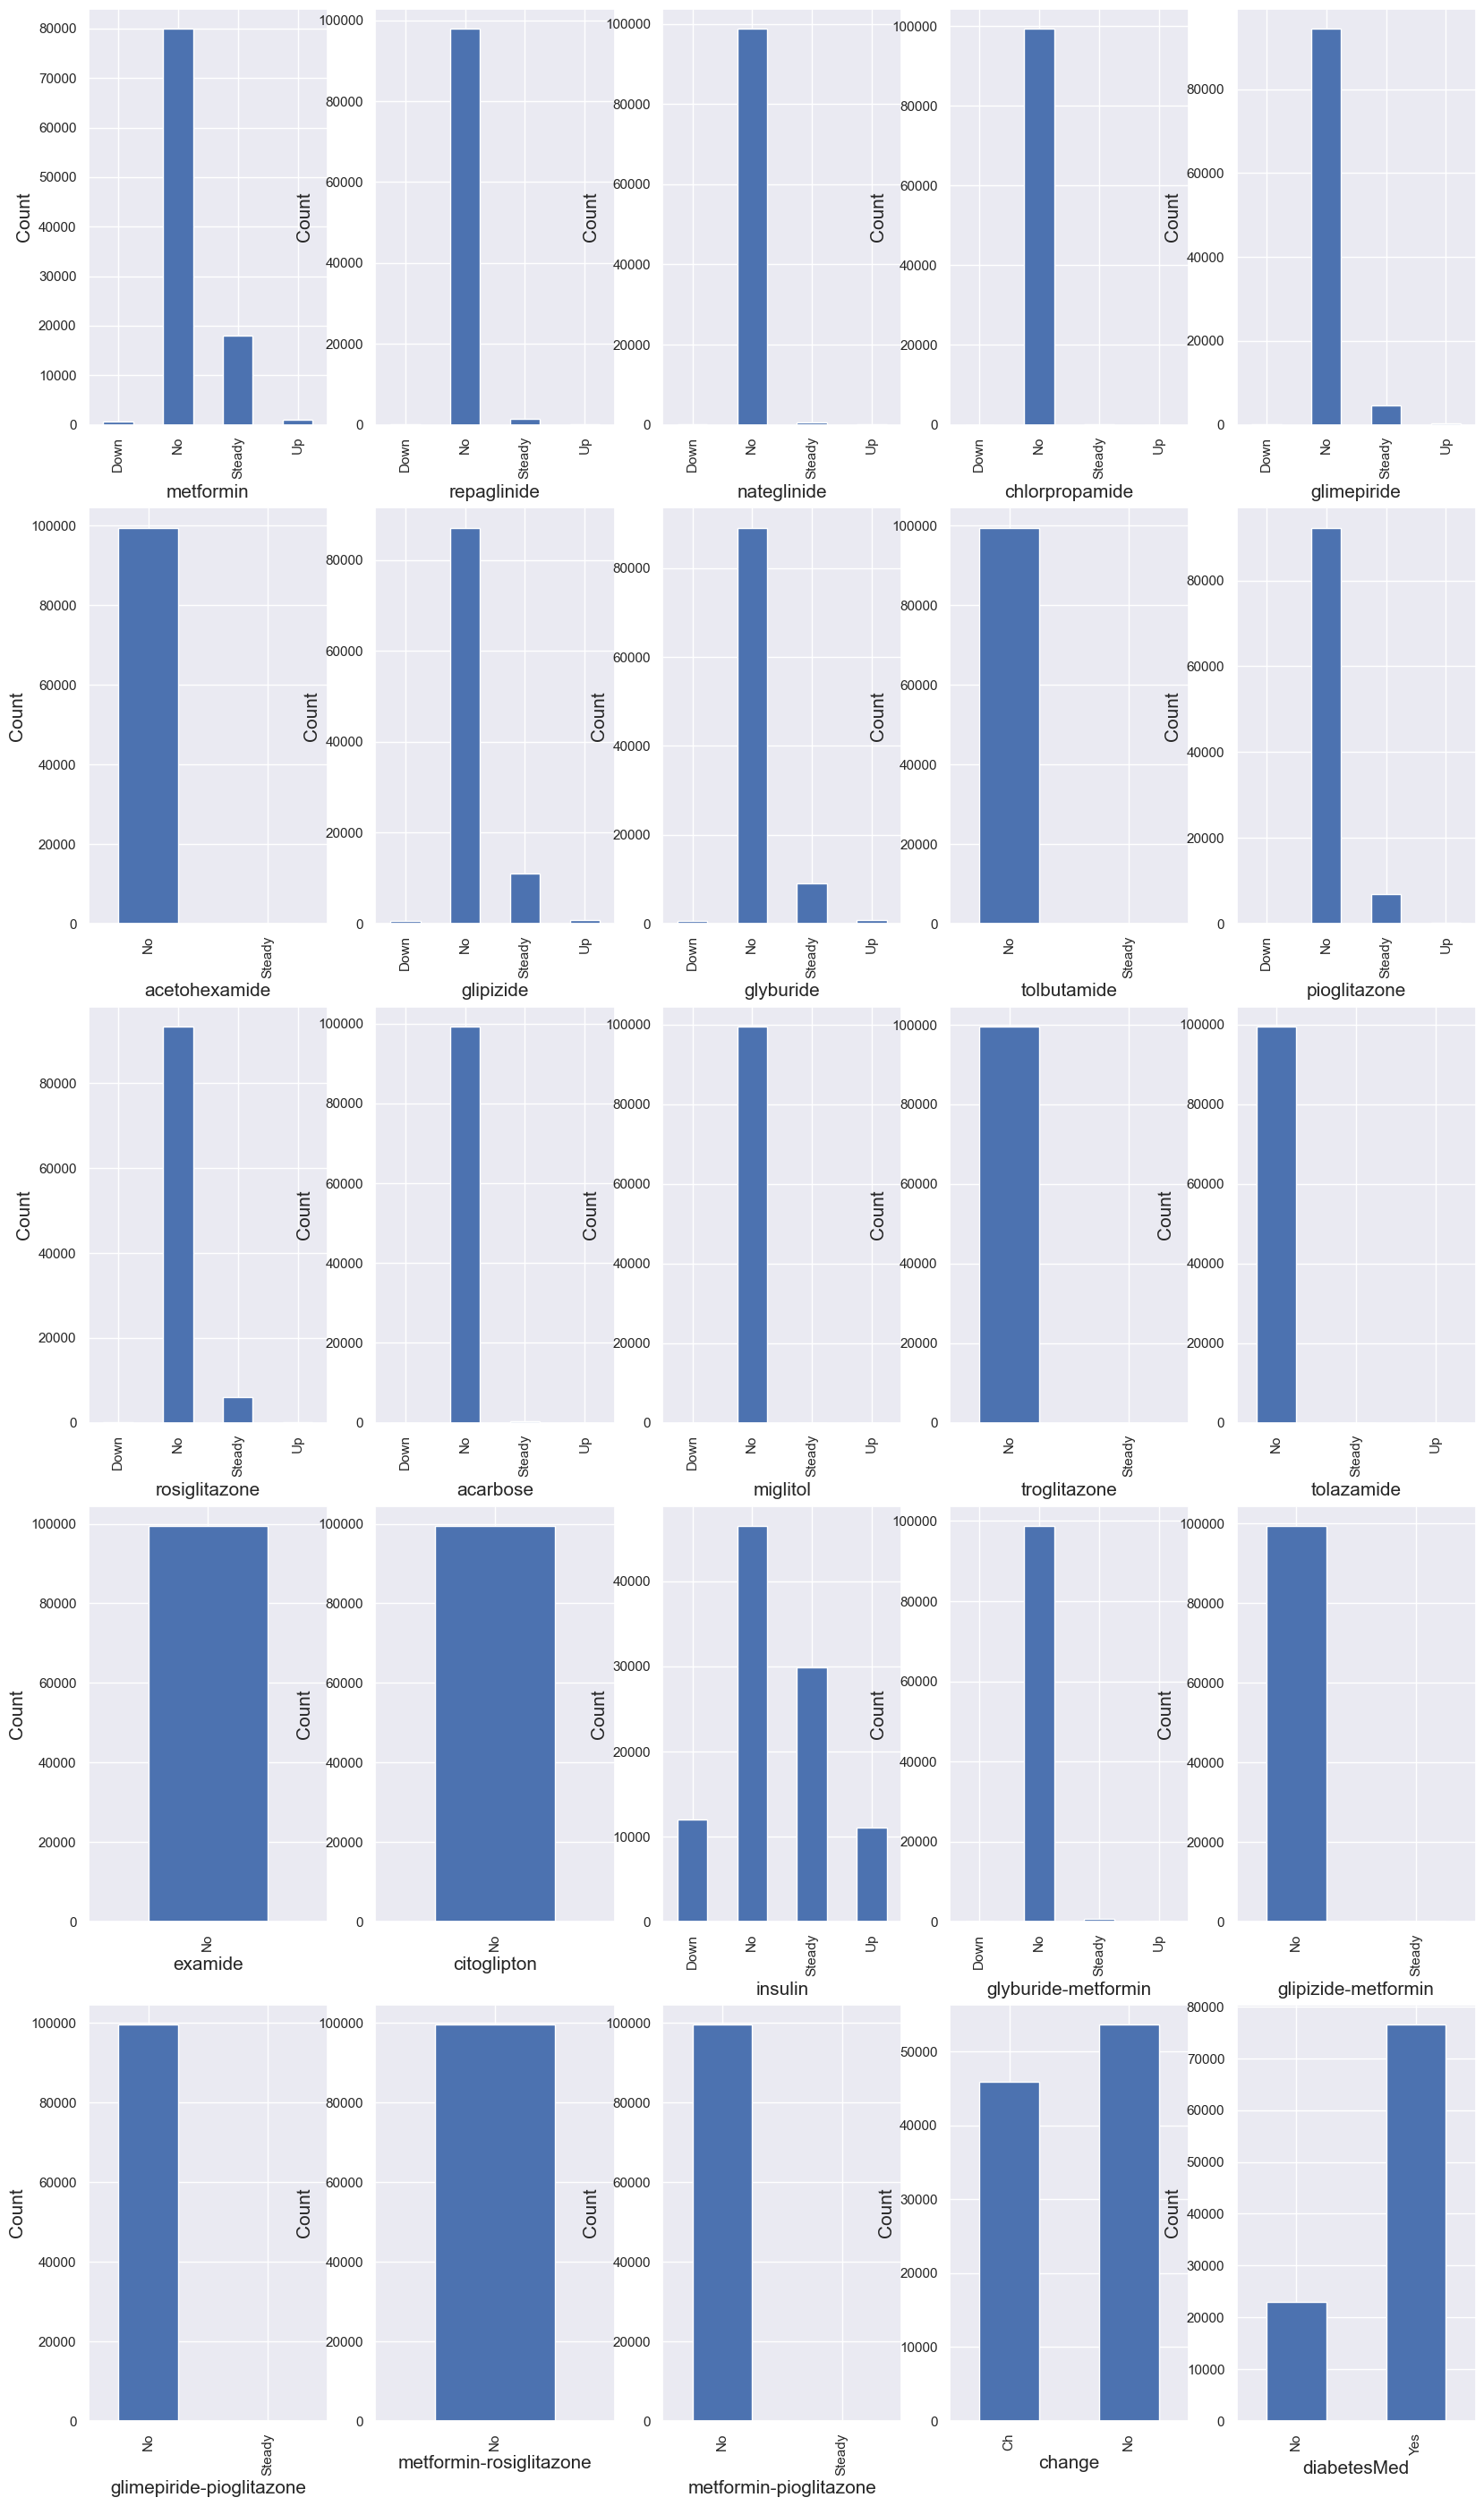

In [28]:
fig = plt.figure(figsize=(20,35))
for i, col in enumerate(categorical_columns):
    ax1 = fig.add_subplot(5,5,i+1)
    ax1 = df.groupby(col).size().plot(kind='bar')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)

plt.show()

In [29]:
remain_columns = ["insulin", "change", "diabetesMed"]
for col in remain_columns:
    categorical_columns.remove(col)
df.drop(categorical_columns, axis=1, inplace=True)

In [30]:
def get_numerical(x):
    if x == "No":
        return 0
    elif x == "Yes" or x == "Ch" or x == "Steady":
        return 1
    elif x == "Up":
        return 2
    else:
        return -1

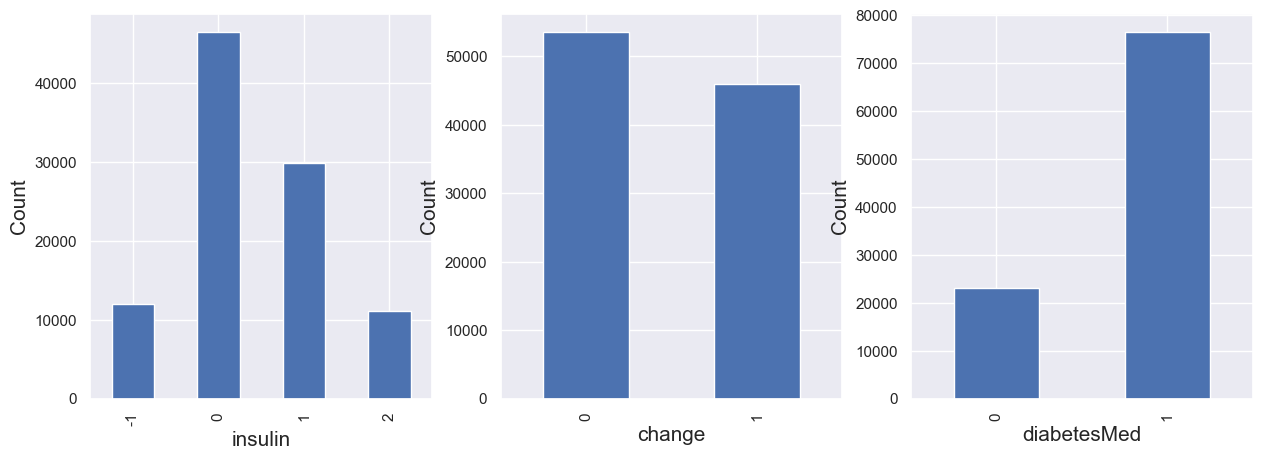

In [31]:
for col in remain_columns:
    df[col] = pd.Series([ get_numerical(x) for x in df[col]])

fig = plt.figure(figsize=(15,5))
for i, col in enumerate(remain_columns):
    ax1 = fig.add_subplot(1,3,i+1)
    ax1 = df.groupby(col).size().plot(kind='bar')
    plt.xlabel(col, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    
plt.show()

In [32]:
print("remove percentage" ,1 - df.shape[0]/original_size)

remove percentage 0.022345380578975282


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              99492 non-null  int64  
 1   race                      99492 non-null  int64  
 2   gender                    99492 non-null  int64  
 3   age                       99492 non-null  float64
 4   admission_type_id         99492 non-null  int64  
 5   discharge_disposition_id  99492 non-null  int64  
 6   admission_source_id       99492 non-null  int64  
 7   time_in_hospital          99492 non-null  int64  
 8   num_lab_procedures        99492 non-null  int64  
 9   num_procedures            99492 non-null  int64  
 10  num_medications           99492 non-null  int64  
 11  number_outpatient         99492 non-null  int64  
 12  number_emergency          99492 non-null  int64  
 13  number_inpatient          99492 non-null  int64  
 14  diag_1

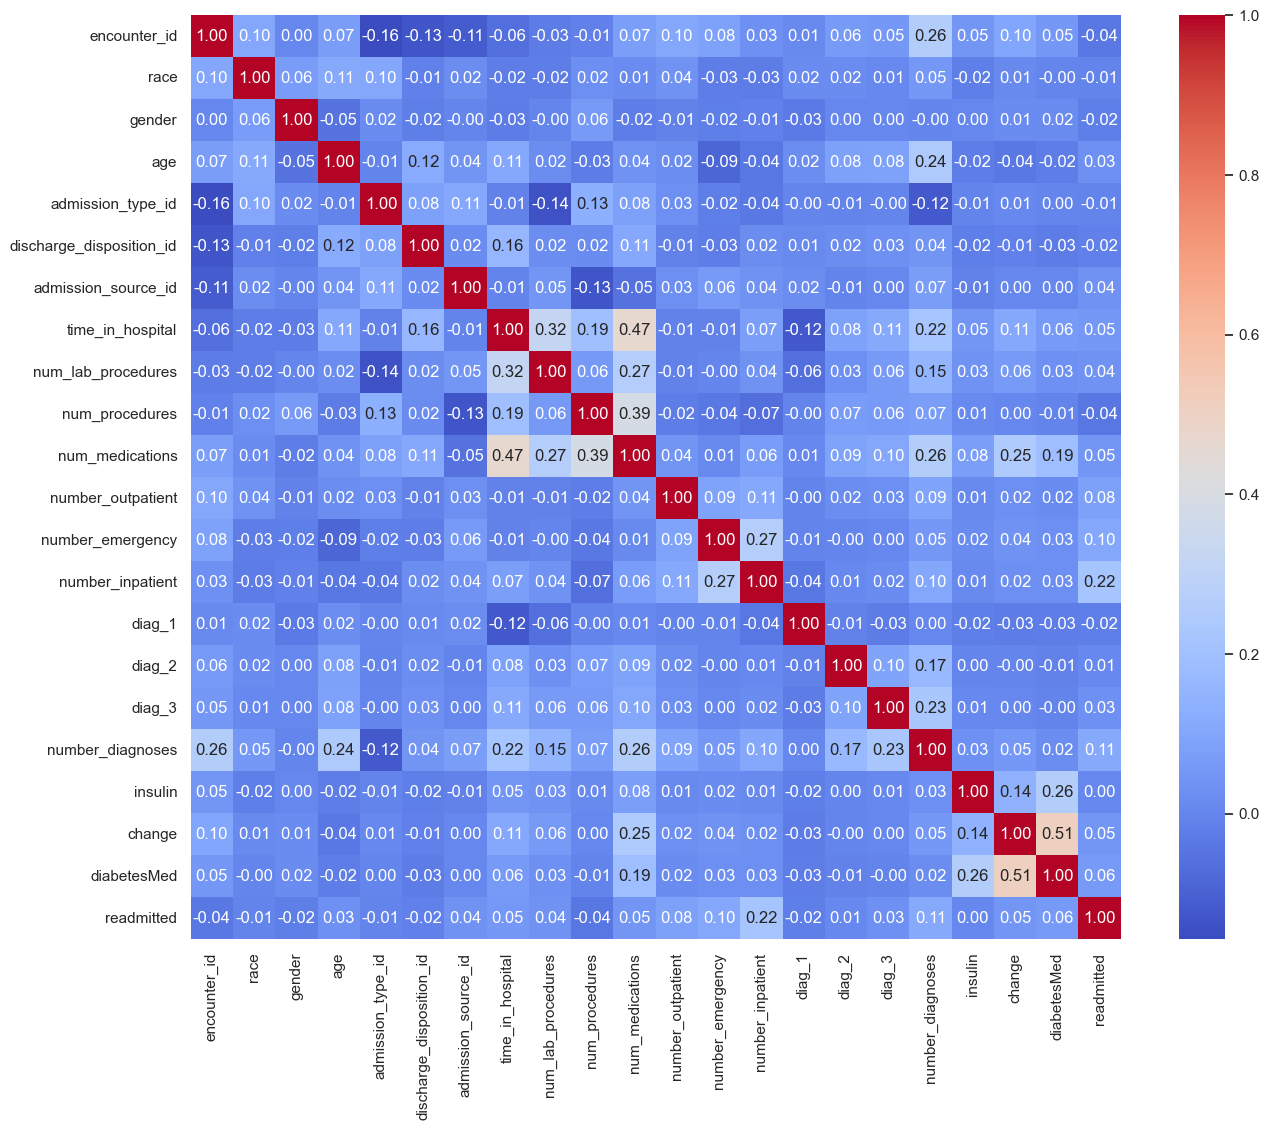

In [34]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

normalize:

In [35]:
id_encounter = df["encounter_id"].copy()
df.drop(['encounter_id'], axis=1, inplace=True)

numerical_features = df.columns.to_list()
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

df_standardized.shape

(99492, 21)

In [36]:
scaler = FunctionTransformer()
features = np.array(df.copy())
features_scaled = scaler.fit_transform(features)
scaler = Normalizer()
features_normalize = scaler.fit_transform(features_scaled)

features_normalize.shape

(99492, 21)

## Dimensionality Reduction <a id='reduction'></a>

Principal Component Analysis (PCA) is a widely used unsupervised machine learning algorithm for dimensionality reduction. It was introduced by Karl Pearson in 1901 and is based on the idea of transforming a set of correlated variables into a set of uncorrelated variables, known as principal components.

The main goal of PCA is to reduce the dimensionality of a dataset while preserving the most important patterns or relationships between the variables. This is achieved by identifying a new set of variables that are smaller than the original set but retain most of the sample's information. PCA is particularly useful in exploratory data analysis, predictive modeling, and visualizing high-dimensional data. It helps in finding the most significant features in a dataset, making the data easier to plot in 2D and 3D, and is applicable in various fields such as healthcare, finance, and image processing.

![image](http://www.nlpca.org/fig_pca_principal_component_analysis.png)

In [37]:
def get_pca_features(features_scaled, n_components, random_state):
    pca = PCA(n_components = n_components, random_state = random_state)
    pca.fit(features_scaled)
    features_pca = pca.transform(features_scaled)
    return features_pca

def plot_2D_scatterplot(features_scaled, pred_labels):
    plt.figure(figsize=(6, 5))
    features_pca = get_pca_features(features_scaled, 2, 45)
    sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=pred_labels, palette='viridis')
    plt.show()

def plot_3D_scatterplot(features_scaled, pred_labels):
    features_pca = get_pca_features(features_scaled, 3, 45)
    fig = plt.figure(figsize=(6.4, 6.4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=pred_labels, cmap='viridis')
    plt.show()

c:\Users\USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


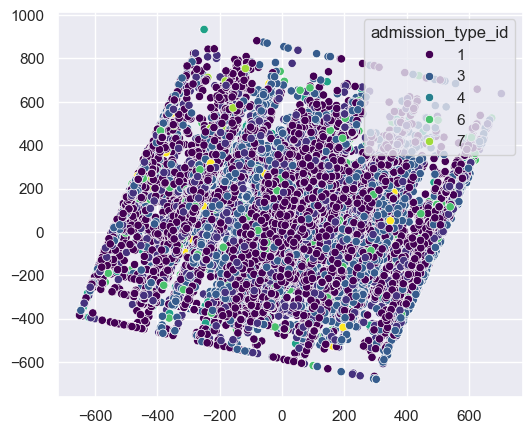

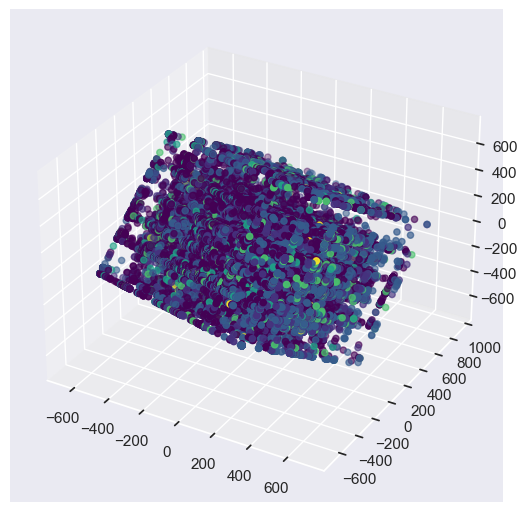

In [38]:
plot_2D_scatterplot(features_scaled, df["admission_type_id"])
plot_3D_scatterplot(features_scaled, df["admission_type_id"])

c:\Users\USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


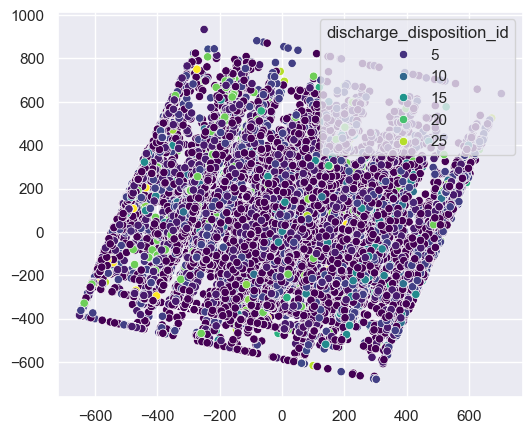

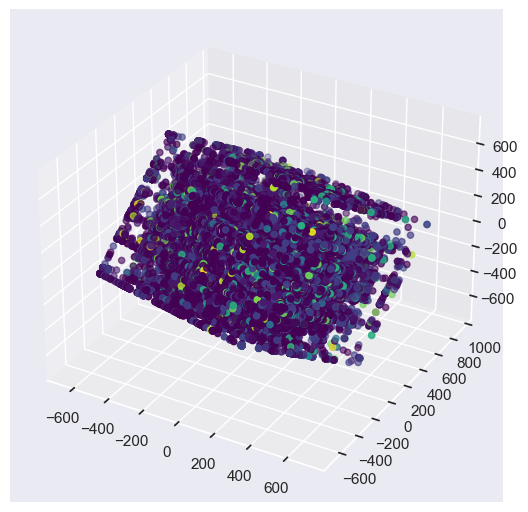

In [39]:
plot_2D_scatterplot(features_scaled, df["discharge_disposition_id"])
plot_3D_scatterplot(features_scaled, df["discharge_disposition_id"])

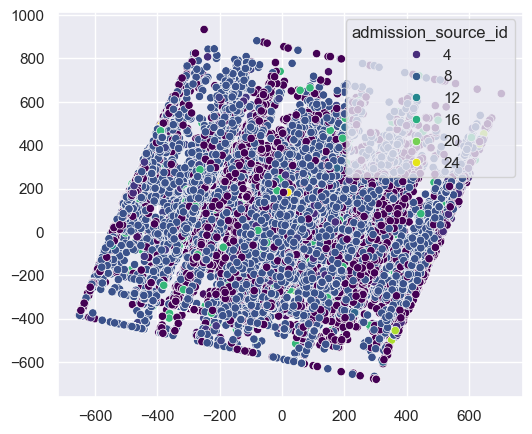

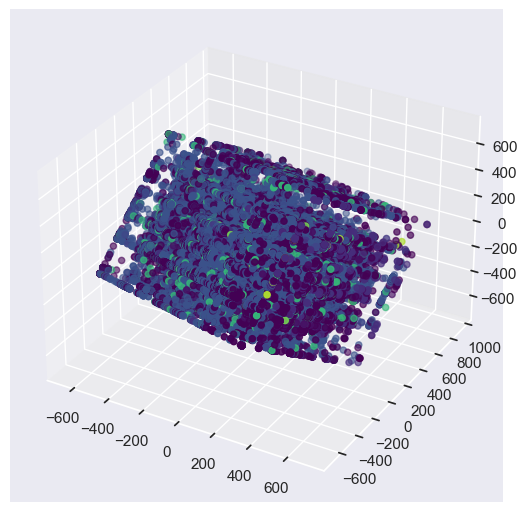

In [40]:
plot_2D_scatterplot(features_scaled, df["admission_source_id"])
plot_3D_scatterplot(features_scaled, df["admission_source_id"])

## Unsupervised Learning <a id='learning'></a>

### K-Means <a id='kmeans'></a>

K-means is a widely recognized unsupervised machine learning algorithm used for clustering, which aims to partition a dataset into a predefined number of clusters (K). The algorithm works by assigning each data point to the nearest centroid, with the goal of minimizing the total intra-cluster variance. This process involves iteratively recalculating the centroids based on the mean of all points in each cluster and reassigning points to the nearest centroid until the algorithm converges to a stable solution. The choice of the number of clusters (K) is crucial and can significantly impact the results.

![image](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

![image](https://dashee87.github.io/images/kmeans.gif)

In [41]:
class K_Means:
    def __init__(self, points,k=2, random_seed=0 , max_iter = 10):
        self.k = k
        self.max_iterations = max_iter
        self.random_seed = random_seed
        self.points = points

    def euclidean_distance(self, point1, point2):
        return np.linalg.norm(point1 - point2)
    
    def get_random_centroids(self, random_seed):
        np.random.seed(random_seed) 
        random_numbers = np.random.choice(range(self.points.shape[0]), size=self.k, replace=False)
        centroids = {i:self.points[random_index] for i, random_index in enumerate(random_numbers)}
        return centroids
    
    def clustering_points(self):
        clusters = {i:[] for i in range(self.k)}
        for i in range(self.points.shape[0]):
            distances = {key:self.euclidean_distance(self.points[i], value) for key, value in self.centroids.items()}
            cluster_index = min(distances, key=distances.get)
            clusters[cluster_index].append(i)       
        return clusters

    def get_new_centroids(self,previous):
        centroids = {}
        for cluster_index, points_index_in_cluster in self.clusters.items():
            cluster_points = [self.points[index] for index in points_index_in_cluster]
            if len(cluster_points) > 0:
                centroids[cluster_index] = np.mean(np.array(cluster_points), axis=0)
            else:
                centroids[cluster_index] = previous[cluster_index]
        return centroids

    def has_centroids_covered(self, previous):
        for index in range(self.k):
            if np.linalg.norm(previous[index] - self.centroids[index]) != 0:
                return False
        return True 
    
    def get_cluster_labels(self, clusters, k, points):        
        new_labels = [0] * len(points)
        for i in range(k):
            for point_index in clusters[i] :
                new_labels[point_index] = i 
        return new_labels

    def fit(self):
        self.centroids = self.get_random_centroids(self.random_seed)

        for _ in range(self.max_iterations):
            self.clusters = self.clustering_points()
            previous = dict(self.centroids)
            self.centroids = self.get_new_centroids(previous)
            if self.has_centroids_covered(previous):
                break
            
        return self.get_cluster_labels(self.clusters, self.k, self.points)

**Elbow Method**:

The Elbow Method is a technique used in k-means clustering to determine the optimal number of clusters (k). It involves plotting the explained variation (or within-cluster sum of squares, WCSS) against the number of clusters. The method suggests that the optimal number of clusters is the point at which the addition of more clusters does not significantly decrease the WCSS, forming an "elbow" shape in the graph. This point is chosen as the optimal k because it represents a balance between having too few clusters (which may oversimplify the data) and too many clusters (which may overcomplicate the data without providing additional insight).

The Elbow Method is implemented by iterating through different values of k, from 1 to a chosen maximum (n), and calculating the WCSS for each. The WCSS is defined as the sum of the squared distances between each data point and its assigned cluster centroid. By plotting these values, the method visually identifies the elbow point, which is the point where adding more clusters does not significantly improve the model's fit to the data.

However, it's important to note that the Elbow Method has its limitations. In many real-world datasets, there may not be a clear elbow point, making it challenging to determine the optimal k. In such cases, other methods like the silhouette score might be more reliable for determining the optimal number of clusters.

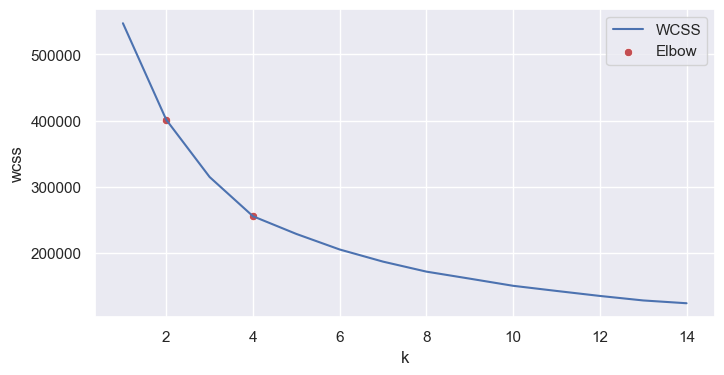

In [42]:
sns.set_theme()
features_pca = get_pca_features(df_standardized, 3, 1)

k_max = 15
wcss = []
for k in range(1, k_max, 1):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 20, n_init = 5, random_state = 61)
    pred_labels_kmeans = kmeans.fit_predict(features_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, k_max), wcss, label = "WCSS")
sns.scatterplot(x=[2], y=[wcss[1]], color= "r", label = "Elbow")
sns.scatterplot(x=[4], y=[wcss[3]], color= "r")
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

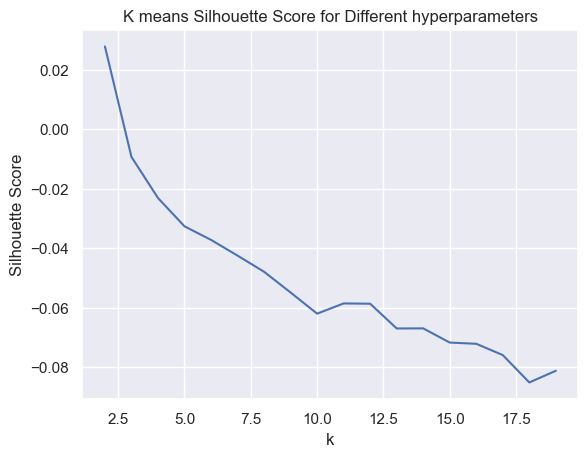

In [43]:
k_list = range(2,20)
features_pca = get_pca_features(df_standardized, 1, 5)
scores = {'k': [], 'silhouette_score': []}
scores_df = pd.DataFrame(scores)

for i, k in enumerate(k_list):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 20, n_init = 5, random_state = 2)
    pred_labels_kmeans = kmeans.fit_predict(features_pca)
    sil_score = silhouette_score(features_scaled[0:10000], pred_labels_kmeans[0:10000])
    
    new_row = {'k': k, 'silhouette_score': sil_score}
    scores_df.loc[i] = new_row


sns.set_theme() 
plt.plot(scores_df['k'], scores_df['silhouette_score'])
plt.title('K means Silhouette Score for Different hyperparameters')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.show()

**With Silhouette Score**:

In [196]:
def find_optimal_k(features_scaled):
    k_range = range(2,20)

    output = []
    for k in k_range:
        kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 20, n_init = 5, random_state = 2)
        pred_labels_kmeans = kmeans.fit_predict(features_scaled)
        sil_score = silhouette_score(features_scaled[0:1000], pred_labels_kmeans[0:1000])
        output.append((k, sil_score))

    k, score = sorted(output, key=lambda x:x[-1])[-1]
    return k

k: 2
Silhouette Score= 0.56


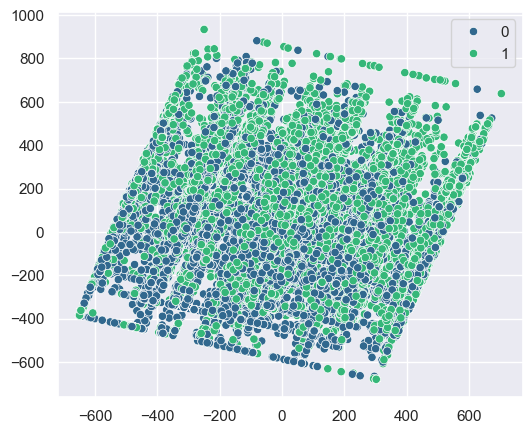

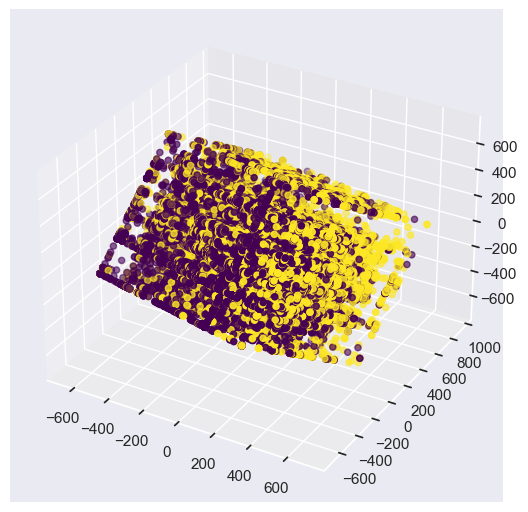

In [299]:
features_pca = get_pca_features(df_standardized, 1, 5)
k = find_optimal_k(features_pca)
print(f"k: {k}")

features_pca = get_pca_features(df_standardized, 1, 5)
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 20, n_init = 5, random_state = 2)
pred_labels_kmeans = kmeans.fit_predict(features_pca)
silho_score = silhouette_score(features_pca[0:10000], pred_labels_kmeans[0:10000])
print(f"Silhouette Score= {silho_score:.2f}")

plot_2D_scatterplot(features_scaled, pred_labels_kmeans)
plot_3D_scatterplot(features_scaled, pred_labels_kmeans)

k: 4
Silhouette Score= 0.53


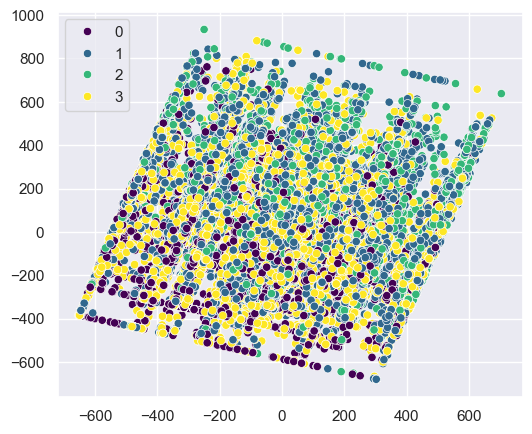

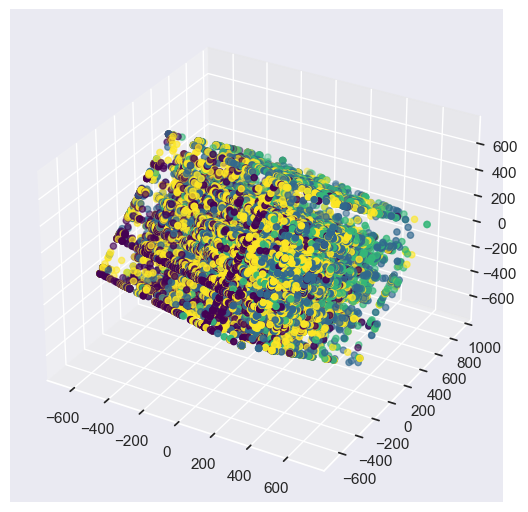

In [198]:
features_pca = get_pca_features(df_standardized, 1, 5)
k = 4
print(f"k: {k}")

features_pca = get_pca_features(df_standardized, 1, 5)
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 20, n_init = 5, random_state = 2)
pred_labels_kmeans = kmeans.fit_predict(features_pca)
silho_score = silhouette_score(features_pca[0:10000], pred_labels_kmeans[0:10000])
print(f"Silhouette Score= {silho_score:.2f}")

plot_2D_scatterplot(features_scaled, pred_labels_kmeans)
plot_3D_scatterplot(features_scaled, pred_labels_kmeans)

### DBSCAN <a id='DBSCAN'></a>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that was introduced in 1996. It is particularly known for its ability to identify clusters of arbitrary shapes and sizes, making it versatile for various clustering tasks. Unlike partition-based clustering methods like k-means, which require the user to specify the number of clusters, DBSCAN automatically determines the number of clusters based on the data's density.

DBSCAN operates by defining two key hyperparameters:

- **Epsilon (ε)**: The maximum distance between two points for them to be considered as neighbors.
- **Min_samples**: The minimum number of neighbors a point must have to be considered a core point. This includes the point itself.

The algorithm starts by identifying core points, which are points that have at least min_samples within a radius of ε. It then expands clusters from these core points by adding points that are within the ε distance of the core points. Points that are not part of any cluster are considered noise or outliers.

DBSCAN is particularly useful for datasets with clusters of varying densities and shapes, and it can also identify noise points that do not belong to any cluster. It has been implemented in various programming languages and frameworks, including Python's scikit-learn and R's dbscan package. 

![image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*KqWII7sFp1JL0EXwJGpqFw.png)

![image](https://media.licdn.com/dms/image/C5612AQHYc7HfU1jD3g/article-cover_image-shrink_600_2000/0/1611735338466?e=2147483647&v=beta&t=Cn-fy3lbETPflTjKdpubRJwnGWqIZzTbtaOH28tOM6A)

In [244]:
class DBSCAN_SCR:
    def __init__(self, eps = 0.01, min_samples = 5):
        self.eps = eps
        self.min_samples = min_samples
        self.cluster_count = 0

    def euclidean_distance(self, point1, point2):					
        return np.linalg.norm(point1-point2)					

    def get_range_query(self, data, i):				
        point_count = len(data)					
        neighbours = np.array([], dtype=int)	
        for j in np.arange(point_count):
            distance = self.euclidean_distance(data[i], data[j])	
            if distance <= self.eps: 					
                neighbours = np.append(neighbours, [j])	
        return neighbours
    
    def get_clusters(self, data):						
        point_count = len(data)						
        labels = np.zeros((point_count), dtype=int)

        for i in np.arange(point_count):			
            if labels[i] != 0 :						
                continue
            
            neighbours = self.get_range_query(data, i)	
            if len(neighbours) < self.min_samples:		
                labels[i] = -1						
                continue

            self.cluster_count = self.cluster_count + 1	
            labels[i] = self.cluster_count			

            seed_set = np.setdiff1d(neighbours, [i])	
            for k in seed_set:
                if labels[k] == -1:					
                    labels[k] = self.cluster_count	
                if labels[k] != 0:					
                    continue

                labels[k] = self.cluster_count		
                other_neighbours = self.get_range_query(data, k) 
                if len(other_neighbours) >= self.min_samples:	
                    seed_set = np.append(seed_set, other_neighbours)

        return labels
        

**find optimal 'eps'**:

The Silhouette Score can indeed help identify the optimal eps (epsilon) value in DBSCAN by indicating the point at which the silhouette scores are highest. This method involves evaluating the quality of clustering for different eps values and selecting the one that results in the highest average silhouette score. The silhouette score measures how well each data point fits within its assigned cluster compared to neighboring clusters.

To find the optimal eps using the Silhouette Score, I would typically perform a grid search over a range of eps values. For each eps value, I would run DBSCAN and calculate the average silhouette score for the resulting clusters. The eps value that yields the highest silhouette score is considered the optimal choice, as it indicates the best separation and cohesion within the clusters.

In [292]:
def find_optimal_eps(features_scaled):
    min_samples = range(4,6)
    eps = np.arange(0.5,0.6, 0.05)

    output = []
    for ms in min_samples:
        for ep in eps:
            pred_labels = DBSCAN(min_samples=ms, eps = ep).fit(features_scaled).labels_
            if len(np.unique(pred_labels[0:1000], return_counts=False)) > 1:
                sil_score = silhouette_score(features_scaled[0:2000], pred_labels[0:2000])
                output.append((ms, ep, sil_score))

    min_sample, eps, score = sorted(output, key=lambda x:x[-1])[-1]
    return min_sample, eps

def find_NearestNeighbors(min_sample, features_scaled):
    nn = NearestNeighbors(n_neighbors= min_sample+1).fit(features_scaled)
    distances, indices = nn.kneighbors(features_scaled)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    return distances

def plot_NearestNeighbors(distances, min_sample, eps, features_scaled):
    count = features_scaled.shape[0] - 10
    plt.plot(distances[:count])
    plt.plot(eps/2 * np.ones(count), '--')
    plt.xlabel(f'Sorted Points According to Distance of {min_sample}rd Nearest Neighbor')
    plt.ylabel(f'{min_sample}rd Nearest Neighbor Distance')
    plt.xlim((0,count+1000))
    plt.show()

min_samples: 5
eps: 0.55


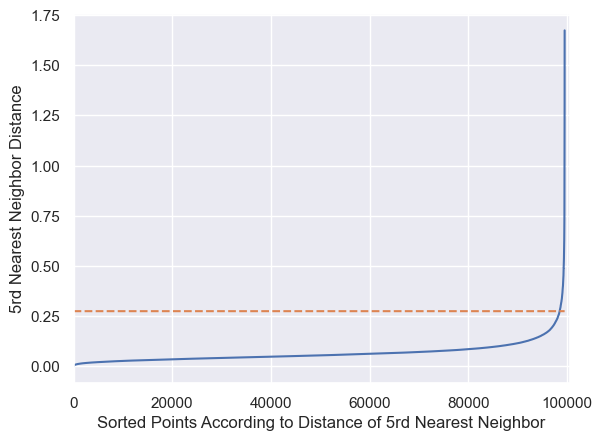

In [293]:
features_pca = get_pca_features(df_standardized, 3, 5)
min_sample, eps = find_optimal_eps(features_pca)
print(f"min_samples: {min_sample}")
print(f"eps: {eps}")
distances = find_NearestNeighbors(min_sample, features_pca)
plot_NearestNeighbors(distances, min_sample, eps, features_pca)


Silhouette Score= 0.41


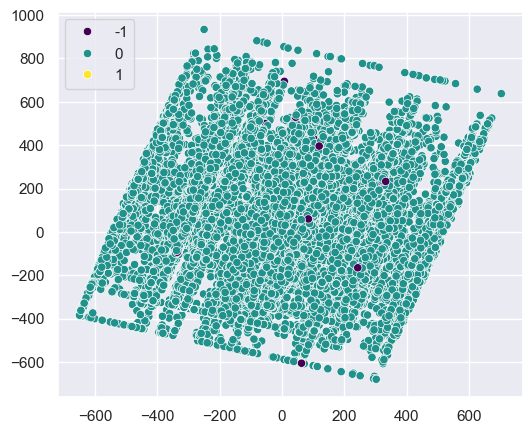

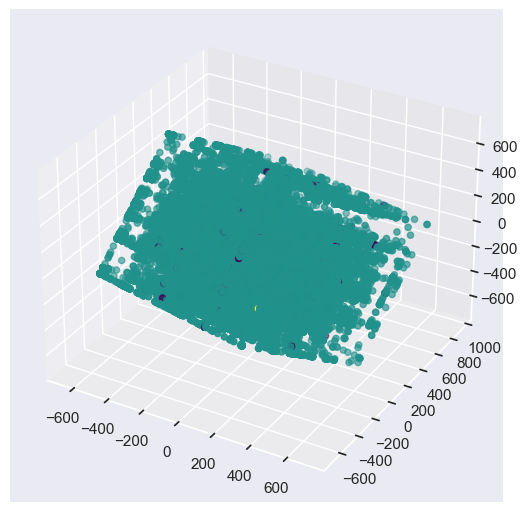

In [291]:
features_pca = get_pca_features(df_standardized, 3, 5)
dbscan = DBSCAN(eps= eps, min_samples= min_sample)
pred_labels_dbscan = dbscan.fit_predict(features_pca)
silho_score = silhouette_score(features_scaled[0:1000], pred_labels_dbscan[0:1000])
print(f"Silhouette Score= {silho_score:.2f}")

plot_2D_scatterplot(features_scaled, pred_labels_dbscan)
plot_3D_scatterplot(features_scaled, pred_labels_dbscan)

### Silhouette Method <a id='silhouette'></a>

The Silhouette Score is a measure used to evaluate the quality of clustering, particularly in k-means clustering. It is an intrinsic method, meaning it does not require ground truth labels to assess the clustering performance. The Silhouette Score is calculated for each data point in the dataset and is based on the silhouette coefficient, which ranges from -1 to 1. A silhouette coefficient close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. Conversely, a coefficient close to -1 suggests that the data point is poorly matched to its own cluster and well-matched to neighboring clusters. A score of 0 indicates overlapping clusters.

The Silhouette Score is particularly useful when the ground truth labels are not available, making it a valuable tool for assessing the effectiveness of clustering algorithms. It provides a more nuanced understanding of clustering quality compared to the Elbow Method, which relies on the visual inspection of a plot of the within-cluster sum of squares against the number of clusters. The Silhouette Score can help identify the optimal number of clusters by indicating the point at which the silhouette scores are highest, suggesting that the clustering is well-defined and cohesive.

In [140]:
silho_score = silhouette_score(features_pca[0:10000], pred_labels_kmeans[0:10000])
print(f"Silhouette Score= {silho_score:.2f}")

dbscan = DBSCAN(eps= 0.3, min_samples= 5)
silho_score = silhouette_score(features_scaled[0:1000], pred_labels_dbscan[0:1000])
print(f"Silhouette Score= {silho_score:.2f}")

Silhouette Score= 0.14
Silhouette Score= 0.17


## Questions <a id='questions'></a>

Q1- What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.

Data Preprocessing Workflow:

- **Remove Null Features**: Identify and exclude features that contain null values, ensuring data integrity and consistency across datasets.

- **Filter Out Unnecessary Features**: Evaluate and eliminate features that do not contribute significantly to the predictive model, focusing on those that have a direct impact on the outcome.

- **Convert Categorical Data to Numeric**: Transform categorical variables into numerical representations using techniques such as one-hot encoding or ordinal encoding, enabling machine learning algorithms to process these variables effectively.

- **Normalize Feature Values**: Standardize feature scales by applying normalization techniques (e.g., Min-Max scaling or Z-score normalization), ensuring that all features contribute equally to the model's performance without being dominated by scale differences.

Q2- What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?

Removed ones:

- Unnecessary Features:

    - patient_nbr

    - payer_code

- There are excessive null values:

    - max_glu_serum

    - A1Cresult

    - weight

    - medical_specialty

- No information is provided:

    - metformin

    - repaglinide

    - nateglinide

    - chlorpropamide

    - glimepiride

    - acetohexamide

    - glipizide

    - glyburide

    - tolbutamide

    - pioglitazone

    - rosiglitazone

    - acarbose

    - miglitol

    - troglitazone

    - tolazamide

    - examide

    - citoglipton

    - glyburide-metformin

    - glipizide-metformin

    - glimepiride-pioglitazone

    - metformin-rosiglitazone

    - metformin-pioglitazone

Q3- Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.

In the report, it was indicated.

Q4- How can we determine the optimal number of clusters in K-Means?

Determining the optimal number of clusters in K-Means clustering is crucial for effective data segmentation. One widely used method for this purpose is the Elbow Method. Here's a step-by-step guide on how to apply the Elbow Method:

- **Calculate Within-Cluster Sum of Squares (WCSS)**: For a range of potential cluster sizes (from 1 to N), run the K-Means algorithm and compute the WCSS for each size. WCSS measures the sum of the squared distances between each point in a cluster and its assigned centroid.

- **Plot WCSS against Cluster Sizes**: Plot the WCSS values on the y-axis and the number of clusters (k) on the x-axis. This plot should show a downward trend as the number of clusters increases.

- **Identify the Elbow Point**: Look for the "elbow" in the plot, which is the point where the rate of decrease in WCSS sharply changes. This point indicates the optimal number of clusters because adding more clusters beyond this point does not significantly reduce the WCSS.

Q5- How can we determine the optimal epsilon value and minPts in DBSCAN?

- **Grid Search**: The Silhouette Score can indeed help identify the optimal eps (epsilon) value in DBSCAN by indicating the point at which the silhouette scores are highest. This method involves evaluating the quality of clustering for different eps values and selecting the one that results in the highest average silhouette score. The silhouette score measures how well each data point fits within its assigned cluster compared to neighboring clusters.

    To find the optimal eps using the Silhouette Score, I would typically perform a grid search over a range of eps values. For each eps value, I would run DBSCAN and calculate the average silhouette score for the resulting clusters. The eps value that yields the highest silhouette score is considered the optimal choice, as it indicates the best separation and cohesion within the clusters.

- **K-Distance Plot**: Compute the k-nearest neighbors (k-NN) for each data point to understand the density distribution of your data. Plot these distances and identify the "elbow" point, where the rate of change in the average distance decreases significantly. This point suggests an optimal ε value

Q6- When would you recommend using K-Means, and when would you suggest using DBSCAN instead?

- **Use K-Means When**:
    - **Large Datasets**: K-Means is generally more efficient for large datasets due to its linear time complexity, making it suitable for applications where computational resources are limited.

    - **Known Number of Clusters**: If we have prior knowledge about the number of clusters in our data, K-Means is straightforward to implement since it requires specifying the number of clusters upfront.

    Convex Shaped Clusters: K-Means tends to form clusters that are more or less spherical or convex in shape, which might be desirable depending on the application.

    - Uniform Density: K-Means works well with datasets where the density of data points is relatively uniform across the entire dataset.

- **Use DBSCAN Instead When**:

    - **Arbitrary Shape Clusters**: DBSCAN excels at identifying clusters of arbitrary shapes and sizes, making it ideal for datasets where clusters are not uniformly distributed or have irregular boundaries.

    - **Handling Noise and Outliers**: DBSCAN inherently identifies and separates noise from clusters, which can be highly beneficial when dealing with messy real-world data or datasets with significant outliers.

    - **Unknown Number of Clusters**: Unlike K-Means, DBSCAN does not require specifying the number of clusters beforehand, allowing it to discover clusters based on the density of data points.

    - **Non-uniform Data Distribution**: DBSCAN performs well with datasets that have varying densities of data points, making it suitable for applications where the density of data points varies significantly.

## References <a id='references'></a>

https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

https://levelup.gitconnected.com/visualizing-clustering-algorithms-k-means-and-dbscan-c4ce62de23c1

https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/

https://medium.com/@okanyenigun/dbscan-demystified-understanding-how-this-parameter-free-algorithm-works-89e03d7d7ab

https://www.youtube.com/watch?v=RDZUdRSDOok

https://muthu.co/mathematics-behind-k-mean-clustering-algorithm/

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

https://www.kaggle.com/code/tanmaymane18/nearestneighbors-to-find-optimal-eps-in-dbscan

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5